In [1]:
import pandas as pd

df = pd.read_csv("datasets/healthy_lifestyle_city_2021.csv", sep=",")
df.head(3)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74


데이터의 문자(단위) 제거 & 실수 자료형으로 변환

In [2]:
import re
import numpy as np

columns = [
    "Cost of a bottle of water(City)",
    "Cost of a monthly gym membership(City)",
    "Obesity levels(Country)",
]

for col in columns:
    df[col] = df[col].map(lambda x: re.sub(r"[^0-9.-]", "", str(x)))
    df[col] = df[col].astype(np.float_)

heatmap을 활용한 시각화

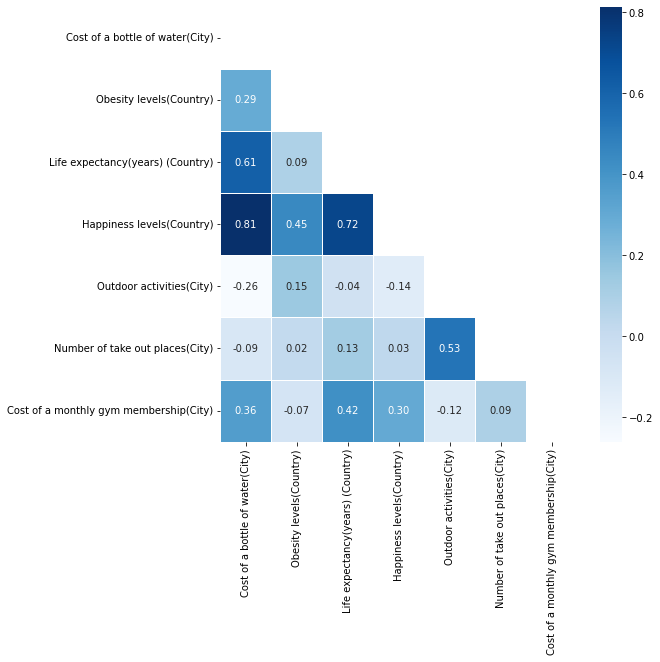

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.iloc[:, 2:].corr()

fig, ax = plt.subplots(figsize=(8, 8))
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
heat_map = sns.heatmap(corr, linewidths=0.5, mask=mask, annot=True, fmt=".2f", cmap="Blues", ax=ax)

일부 항목이 출력되지 않음  
--> 숫자가 아닌 데이터가 여전히 포함되어 있음  

데이터 중 "-" 값을 발견 (기록되지 않은 값)  
--> "-"인 항목 제거 후 진행  

pearson 상관관계 및 p-value를 활용한 분석  

In [4]:
from scipy import stats
from numpy.core._exceptions import UFuncTypeError

corr_data = dict()
score = df["Happiness levels(Country)"]

for col in df.columns[2:]:
    try: 
        data = df[col]
        coef, p_value = stats.pearsonr(score, data)
    except UFuncTypeError as exp:
        mask = np.where(df[col].values != "-")[0]
        filtered_score = score[mask]
        filtered_col = df[col][mask].astype(np.float_)
        coef, p_value = stats.pearsonr(filtered_score, filtered_col)
    if (p_value < 0.05) and (abs(coef) > 0.5):
        corr_data[col] = coef
   
print(*corr_data.items(), sep="\n")

('Cost of a bottle of water(City)', 0.8131592732718269)
('Life expectancy(years) (Country)', 0.7245870841569989)
('Pollution(Index score) (City)', -0.765901571791578)
('Annual avg. hours worked', -0.5315536656780049)
('Happiness levels(Country)', 0.9999999999999998)


상관관계 시각화

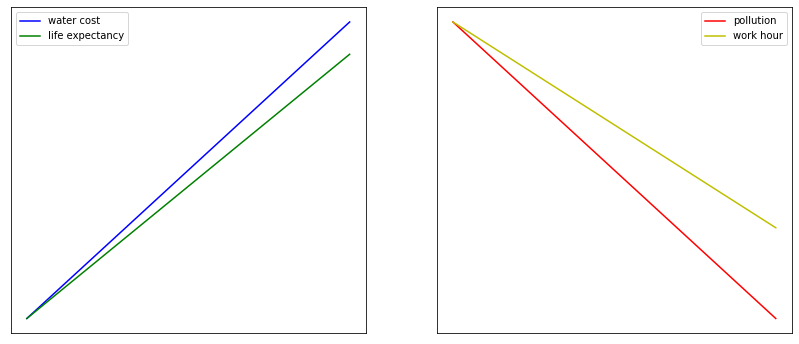

In [5]:
values = list(corr_data.values())
coef_water = values[0]
coef_life = values[1]
coef_pollution = values[2]
coef_work = values[3]

x = np.arange(2)

plt.figure(figsize=(14, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.plot(x, x * coef_water, label="water cost", color="b")
ax1.plot(x, x * coef_life, label="life expectancy", color="g")

ax2.plot(x, x * coef_pollution, label="pollution", color="r")
ax2.plot(x, x * coef_work, label="work hour", color="y")

ax1.set_xticks([])
ax1.set_yticks([])
ax1.legend()

ax2.set_xticks([])
ax2.set_yticks([])
ax2.legend()

plt.show()